## Import Libraries

In [61]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model export
import tf2onnx
import onnx
import onnxruntime as rt
import pickle
import os

## Load and Explore Data

In [62]:
# Load dataset
df = pd.read_csv('dataset/heart_attack_prediction_indonesia.csv')

# Basic data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (158355, 28)

First 5 rows:


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [63]:
# Data information
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  phys

In [64]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())



Descriptive Statistics:


,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Missing values check
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


 ## Data Visualization

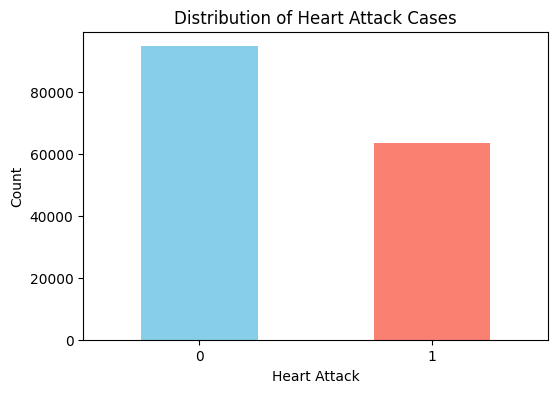

In [66]:
# Target distribution
plt.figure(figsize=(6, 4))
df['heart_attack'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Heart Attack Cases")
plt.xlabel("Heart Attack")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


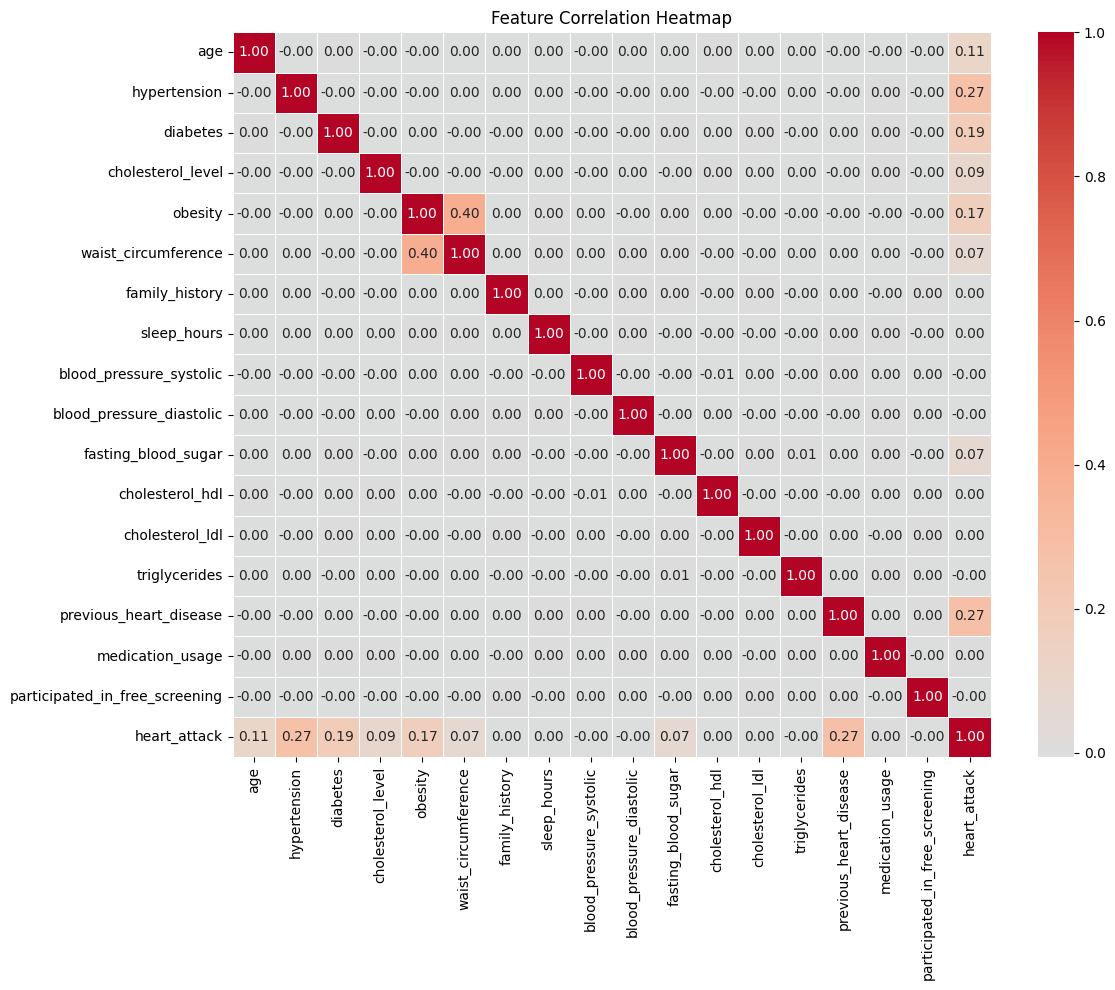

In [67]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

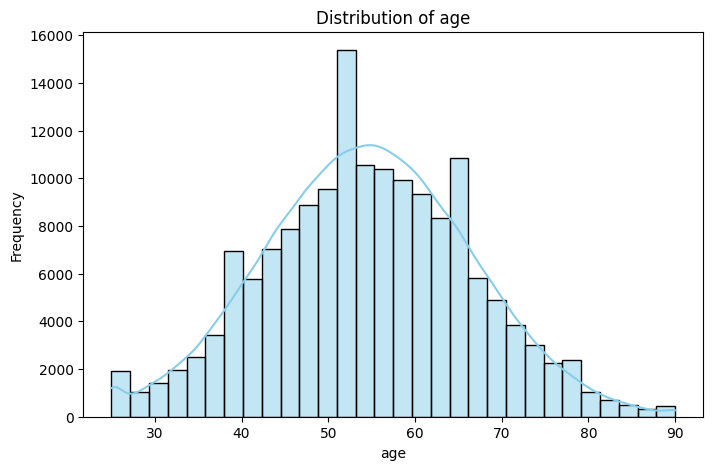

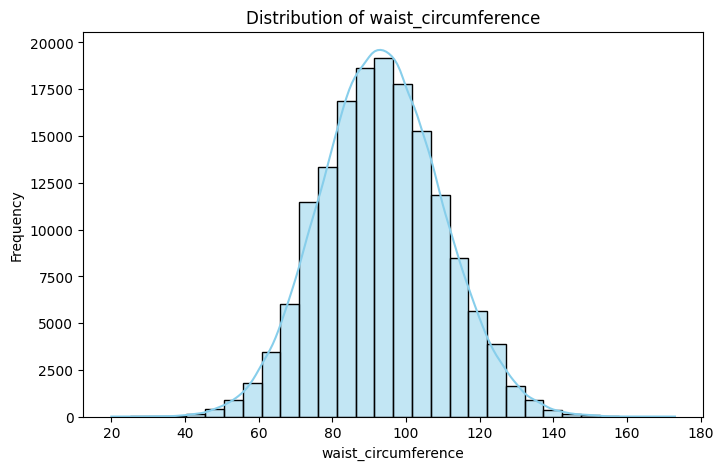

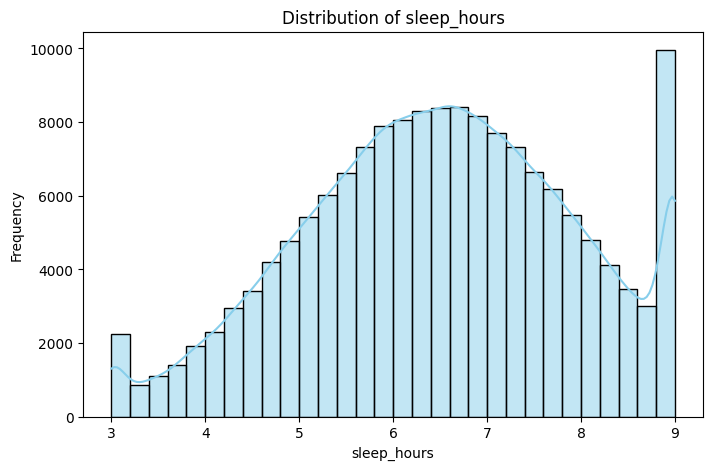

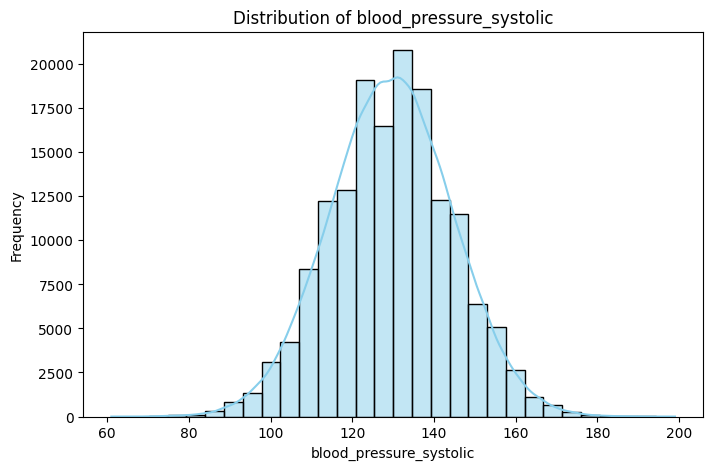

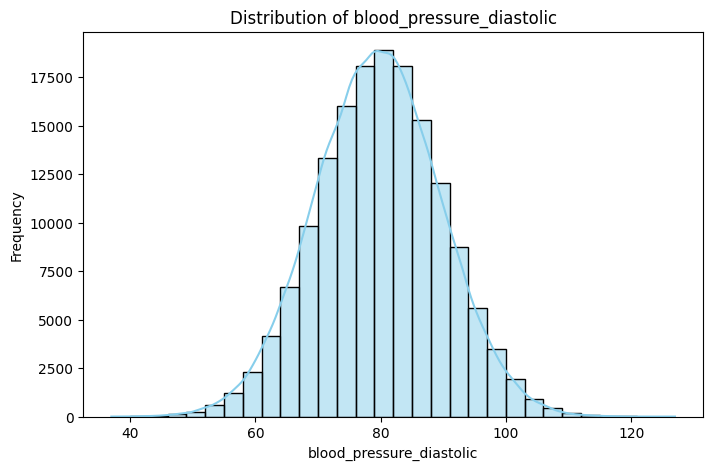

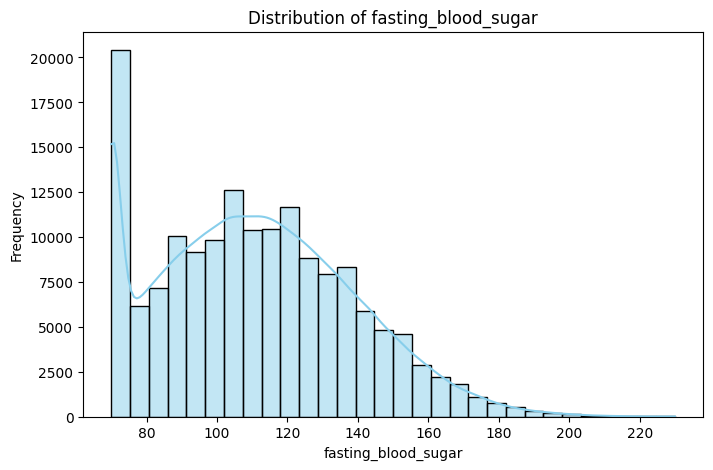

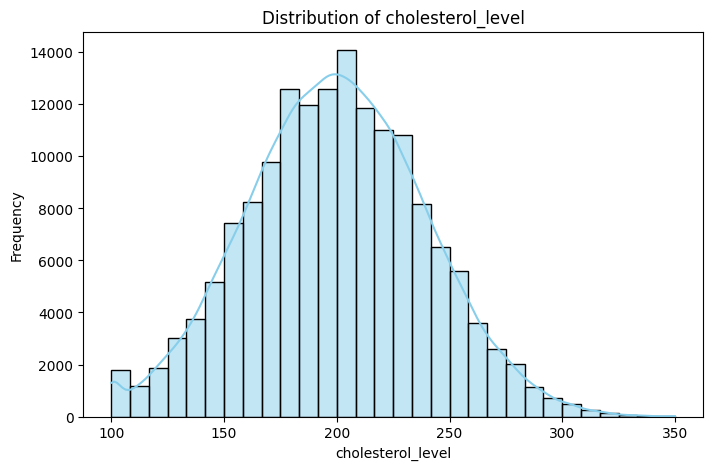

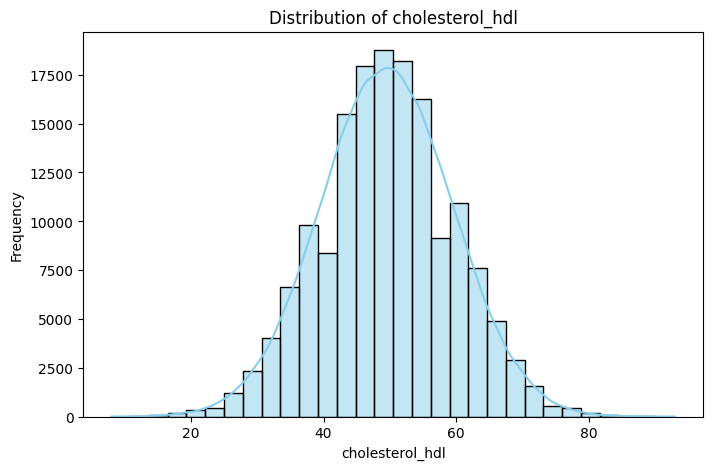

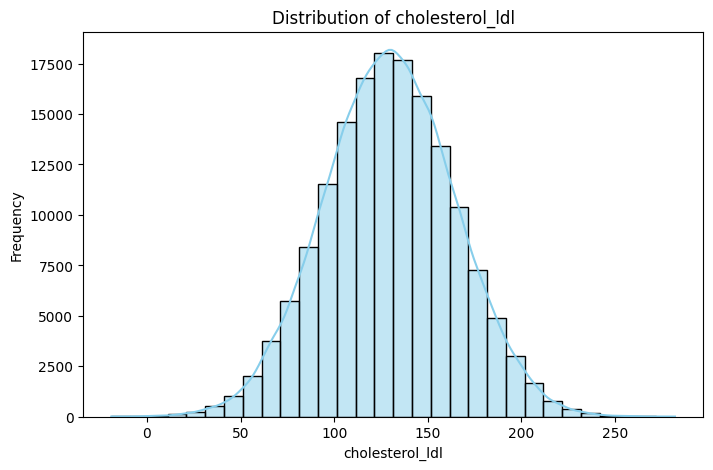

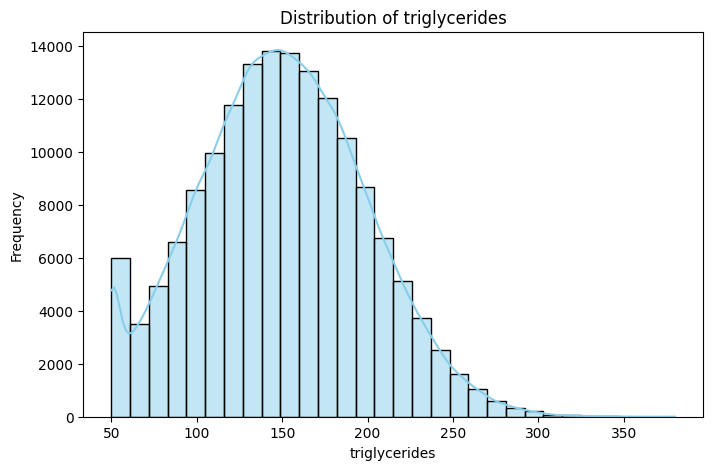

In [68]:
# Feature distributions
numerical_features = [
    'age', 'waist_circumference', 'sleep_hours',
    'blood_pressure_systolic', 'blood_pressure_diastolic',
    'fasting_blood_sugar', 'cholesterol_level',
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Data Preprocessing

In [69]:
# Drop kolom yang tidak relevan atau berkorelasi sangat rendah
df = df.drop(columns=[
    'region', 'income_level', 'family_history', 'sleep_hours',
    'blood_pressure_systolic', 'blood_pressure_diastolic',
    'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
    'cholesterol_level', 'air_pollution_exposure',
    'physical_activity', 'dietary_habits', 'stress_level',
    'EKG_results'
], errors='ignore')

In [70]:
categorical_columns = ['gender', 'smoking_status', 'alcohol_consumption']
le_dict = {}

In [71]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Simpan encoder tiap kolom

In [72]:
# Encode target variable
label_encoder = LabelEncoder()
df['heart_attack'] = label_encoder.fit_transform(df['heart_attack'])


In [73]:
numerical_columns = [
    'age', 'waist_circumference', 'triglycerides'
]

In [74]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [75]:
# Tampilkan data setelah preprocessing
print("Processed Data Sample:")
display(df.head())

Processed Data Sample:


,age,gender,hypertension,diabetes,obesity,waist_circumference,smoking_status,alcohol_consumption,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,0.458088,1,0,1,0,-0.626810,1,2,-0.993729,0,0,0,0
1,-0.129611,0,0,0,0,0.777156,2,2,-0.238986,1,0,1,0
2,0.626002,0,0,0,1,1.143409,2,1,0.434163,0,1,0,1
3,1.549529,1,1,0,0,-0.687852,1,1,-0.075798,0,1,1,0
4,-0.213568,1,1,0,0,-0.260558,0,1,-0.218588,1,0,1,1


## Train-Test Split

In [76]:
# Prepare features and target
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']

In [77]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set shape: (126684, 12)
Test set shape: (31671, 12)

Class distribution in training set:
heart_attack
0    0.598994
1    0.401006
Name: proportion, dtype: float64

Class distribution in test set:
heart_attack
0    0.599002
1    0.400998
Name: proportion, dtype: float64


## Model Building

In [78]:
# Determine number of classes
num_classes = len(y.unique())
print(f"Number of classes: {num_classes}")

Number of classes: 2


In [79]:
# Build neural network model
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

In [80]:
# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [81]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,978 (11.63 KB)

 Trainable params: 2,978 (11.63 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [82]:
# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [83]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6912 - loss: 0.5811 - val_accuracy: 0.7208 - val_loss: 0.5359
Epoch 2/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7197 - loss: 0.5396 - val_accuracy: 0.7206 - val_loss: 0.5340
Epoch 3/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7254 - loss: 0.5317 - val_accuracy: 0.7208 - val_loss: 0.5331
Epoch 4/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7217 - loss: 0.5342 - val_accuracy: 0.7232 - val_loss: 0.5291
Epoch 5/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7235 - loss: 0.5309 - val_accuracy: 0.7235 - val_loss: 0.5297
Epoch 6/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7232 - loss: 0.5311 - val_accuracy: 0.7253 - val_loss: 0.5271
Epoch 7/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7258 - loss: 0.5290 - val_accuracy: 0.7236 - val_loss: 0.5289
Epoch 8/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7223 - loss: 0.5308 - 

In [84]:
# Plot training history
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

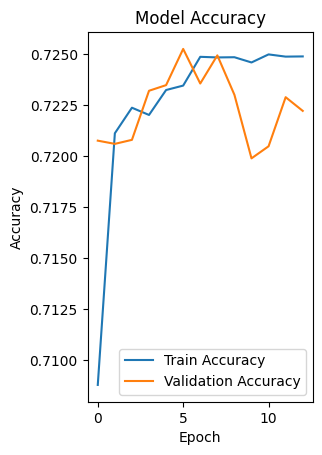

In [85]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

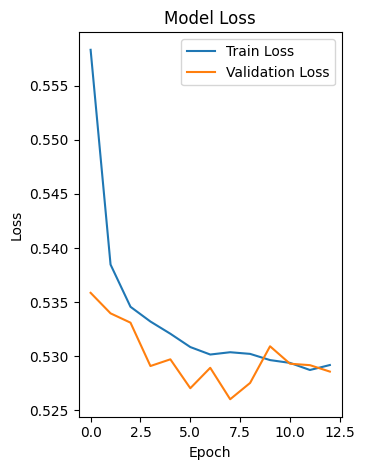

In [86]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

In [87]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.7226
Test Loss: 0.5273


In [88]:
# Predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

990/990 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step


In [89]:
# Classification report - FIXED VERSION
# Create meaningful target names based on label encoder classes
target_names = [f"Class {cls}" for cls in label_encoder.classes_]

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=target_names,
    digits=4
))


Classification Report:
              precision    recall  f1-score   support

     Class 0     0.7383    0.8318    0.7823     18971
     Class 1     0.6902    0.5595    0.6180     12700

    accuracy                         0.7226     31671
   macro avg     0.7142    0.6957    0.7002     31671
weighted avg     0.7190    0.7226    0.7164     31671



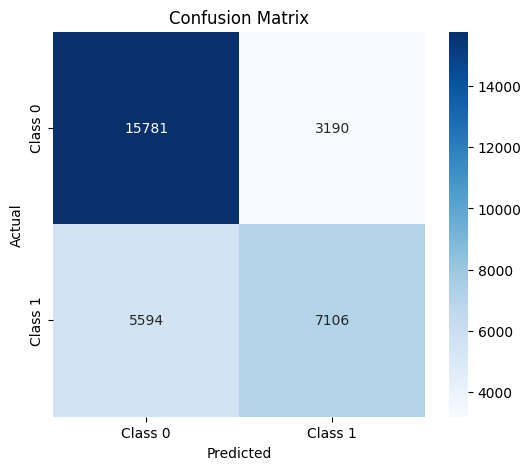

In [ ]:
# Confusion matrix - FIXED VERSION
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Saving and Conversion

In [ ]:
# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('models/encoders', exist_ok=True)

# Save Keras model
model.save('models/heart_attack_model.h5')
print("Keras model saved as 'models/heart_attack_model.h5'")

# Save encoders and scaler
with open('models/encoders/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
    
with open('models/encoders/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
for col, encoder in le_dict.items():
    with open(f'models/encoders/{col}_encoder.pkl', 'wb') as f:
        pickle.dump(encoder, f)
print("Encoders and scaler saved in 'models/encoders/'")

# Convert to ONNX - FIXED VERSION
onnx_path = "models/heart_attack_model.onnx"

# Explicitly set output names for the model
if not hasattr(model, 'output_names'):
    model.output_names = [f'output_{i}' for i in range(len(model.outputs))]

# Input specification
input_spec = (tf.TensorSpec((None, X_train.shape[1]), tf.float32, name="input"),)

# Conversion
try:
    model_proto, _ = tf2onnx.convert.from_keras(
        model,
        input_signature=input_spec,
        opset=13,
        output_path=onnx_path
    )
    print(f"Model successfully converted to ONNX format: {onnx_path}")
    
    # Verify ONNX model
    onnx_model = onnx.load(onnx_path)
    onnx.checker.check_model(onnx_model)
    print("ONNX model is valid")
    
except Exception as e:
    print(f"Error during ONNX conversion: {str(e)}")

Keras model saved as 'models/heart_attack_model.h5'
Encoders and scaler saved in 'models/encoders/'


ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x000001CF24618700>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.


Model successfully converted to ONNX format: models/heart_attack_model.onnx
ONNX model is valid


## Inference

In [ ]:
new_data = {
    'age': [55],
    'gender': ['Male'],  # Harus label yang sudah dikenali oleh le_dict['gender']
    'hypertension': [1],
    'diabetes': [0],
    'obesity': [0],
    'waist_circumference': [90],
    'smoking_status': ['Regular'],  # Harus label yang valid
    'alcohol_consumption': ['Moderate'],  # Harus label yang valid
    'triglycerides': [150],
    'previous_heart_disease': [0],
    'medication_usage': [0],
    'participated_in_free_screening': [1],
}

df_new = pd.DataFrame(new_data)

categorical_columns = ['gender', 'smoking_status', 'alcohol_consumption']
numerical_columns = ['age', 'waist_circumference', 'triglycerides']

def safe_label_encode(le, values):
    encoded = []
    for v in values:
        if v in le.classes_:
            encoded.append(le.transform([v])[0])
        else:
            encoded.append(0)
    return encoded

for col in categorical_columns:
    le = le_dict[col] 
    df_new[col] = safe_label_encode(le, df_new[col])

df_new[numerical_columns] = scaler.transform(df_new[numerical_columns])

onnx_model_path = "models/heart_attack_model.onnx"
ort_session = ort.InferenceSession(onnx_model_path)

input_name = ort_session.get_inputs()[0].name

input_data = df_new[[
    'age', 'gender', 'hypertension', 'diabetes', 'obesity',
    'waist_circumference', 'smoking_status', 'alcohol_consumption',
    'triglycerides', 'previous_heart_disease', 'medication_usage',
    'participated_in_free_screening'
]].to_numpy().astype(np.float32)


outputs = ort_session.run(None, {input_name: input_data})

y_pred_prob = outputs[0]

y_pred_label = np.argmax(y_pred_prob, axis=1)

y_pred_decoded = label_encoder.inverse_transform(y_pred_label)

mapping = {0: "No", 1: "Yes"}

y_pred_label_yes_no = [mapping[label] for label in y_pred_label]

print("Prediksi Yes/No:", y_pred_label_yes_no)

print("Probabilitas per kelas:", y_pred_prob)
print("Prediksi label (angka):", y_pred_label)
print("Prediksi label decoded:", y_pred_decoded)
print("Prediksi Yes/No:", y_pred_label_yes_no)


Prediksi Yes/No: ['Yes']
Probabilitas per kelas: [[0.44351768 0.5564823 ]]
Prediksi label (angka): [1]
Prediksi label decoded: [1]
Prediksi Yes/No: ['Yes']


In [ ]:
new_data = {
    'age': [30],                       # Usia muda, risiko rendah
    'gender': ['Female'],              # Gender bisa dipakai sesuai label
    'hypertension': [0],               # Tidak ada hipertensi
    'diabetes': [0],                  # Tidak ada diabetes
    'obesity': [0],                   # Tidak obesitas
    'waist_circumference': [70],     # Lingkar pinggang kecil
    'smoking_status': ['Never'],     # Tidak pernah merokok
    'alcohol_consumption': ['None'], # Tidak mengkonsumsi alkohol
    'triglycerides': [80],            # Trigliserida rendah
    'previous_heart_disease': [0],    # Tidak ada riwayat penyakit jantung
    'medication_usage': [0],          # Tidak menggunakan obat
    'participated_in_free_screening': [0], # Tidak ikut screening (boleh)
}

df_new = pd.DataFrame(new_data)

categorical_columns = ['gender', 'smoking_status', 'alcohol_consumption']
numerical_columns = ['age', 'waist_circumference', 'triglycerides']

def safe_label_encode(le, values):
    encoded = []
    for v in values:
        if v in le.classes_:
            encoded.append(le.transform([v])[0])
        else:
            encoded.append(0)
    return encoded

for col in categorical_columns:
    le = le_dict[col]  
    df_new[col] = safe_label_encode(le, df_new[col])

df_new[numerical_columns] = scaler.transform(df_new[numerical_columns])

onnx_model_path = "models/heart_attack_model.onnx"
ort_session = ort.InferenceSession(onnx_model_path)

input_name = ort_session.get_inputs()[0].name

input_data = df_new[[
    'age', 'gender', 'hypertension', 'diabetes', 'obesity',
    'waist_circumference', 'smoking_status', 'alcohol_consumption',
    'triglycerides', 'previous_heart_disease', 'medication_usage',
    'participated_in_free_screening'
]].to_numpy().astype(np.float32)

outputs = ort_session.run(None, {input_name: input_data})

y_pred_prob = outputs[0]

y_pred_label = np.argmax(y_pred_prob, axis=1)

y_pred_decoded = label_encoder.inverse_transform(y_pred_label)

mapping = {0: "No", 1: "Yes"}

y_pred_label_yes_no = [mapping[label] for label in y_pred_label]

print("Prediksi Yes/No:", y_pred_label_yes_no)

print("Probabilitas per kelas:", y_pred_prob)
print("Prediksi label (angka):", y_pred_label)
print("Prediksi label decoded:", y_pred_decoded)
print("Prediksi Yes/No:", y_pred_label_yes_no)


Prediksi Yes/No: ['No']
Probabilitas per kelas: [[0.88488126 0.1151187 ]]
Prediksi label (angka): [0]
Prediksi label decoded: [0]
Prediksi Yes/No: ['No']


In [ ]:
new_data = {
     'age': [28],
    'gender': ['Female'],
    'hypertension': [0],
    'diabetes': [0],
    'obesity': [0],
    'waist_circumference': [65],
    'smoking_status': ['Never'],
    'alcohol_consumption': ['None'],
    'triglycerides': [70],
    'previous_heart_disease': [0],
    'medication_usage': [0],
    'participated_in_free_screening': [1],
}

df_new = pd.DataFrame(new_data)

categorical_columns = ['gender', 'smoking_status', 'alcohol_consumption']
numerical_columns = ['age', 'waist_circumference', 'triglycerides']
def safe_label_encode(le, values):
    encoded = []
    for v in values:
        if v in le.classes_:
            encoded.append(le.transform([v])[0])
        else:
            encoded.append(0)
    return encoded

for col in categorical_columns:
    le = le_dict[col] 
    df_new[col] = safe_label_encode(le, df_new[col])

df_new[numerical_columns] = scaler.transform(df_new[numerical_columns])

onnx_model_path = "models/heart_attack_model.onnx"
ort_session = ort.InferenceSession(onnx_model_path)

input_name = ort_session.get_inputs()[0].name

input_data = df_new[[
    'age', 'gender', 'hypertension', 'diabetes', 'obesity',
    'waist_circumference', 'smoking_status', 'alcohol_consumption',
    'triglycerides', 'previous_heart_disease', 'medication_usage',
    'participated_in_free_screening'
]].to_numpy().astype(np.float32)

outputs = ort_session.run(None, {input_name: input_data})

y_pred_prob = outputs[0]

y_pred_label = np.argmax(y_pred_prob, axis=1)

y_pred_decoded = label_encoder.inverse_transform(y_pred_label)

mapping = {0: "No", 1: "Yes"}

y_pred_label_yes_no = [mapping[label] for label in y_pred_label]

print("Prediksi Yes/No:", y_pred_label_yes_no)

print("Probabilitas per kelas:", y_pred_prob)
print("Prediksi label (angka):", y_pred_label)
print("Prediksi label decoded:", y_pred_decoded)
print("Prediksi Yes/No:", y_pred_label_yes_no)


Prediksi Yes/No: ['No']
Probabilitas per kelas: [[0.87779945 0.1222005 ]]
Prediksi label (angka): [0]
Prediksi label decoded: [0]
Prediksi Yes/No: ['No']


In [ ]:
new_data = {
    'age': [60],
    'gender': ['Male'],
    'hypertension': [1],
    'diabetes': [1],
    'obesity': [1],
    'waist_circumference': [105],
    'smoking_status': ['Regular'],
    'alcohol_consumption': ['High'],
    'triglycerides': [220],
    'previous_heart_disease': [1],
    'medication_usage': [1],
    'participated_in_free_screening': [0],
}

df_new = pd.DataFrame(new_data)

categorical_columns = ['gender', 'smoking_status', 'alcohol_consumption']
numerical_columns = ['age', 'waist_circumference', 'triglycerides']

def safe_label_encode(le, values):
    encoded = []
    for v in values:
        if v in le.classes_:
            encoded.append(le.transform([v])[0])
        else:
            encoded.append(0)
    return encoded
for col in categorical_columns:
    le = le_dict[col]  
    df_new[col] = safe_label_encode(le, df_new[col])

df_new[numerical_columns] = scaler.transform(df_new[numerical_columns])

onnx_model_path = "models/heart_attack_model.onnx"
ort_session = ort.InferenceSession(onnx_model_path)

input_name = ort_session.get_inputs()[0].name

input_data = df_new[[
    'age', 'gender', 'hypertension', 'diabetes', 'obesity',
    'waist_circumference', 'smoking_status', 'alcohol_consumption',
    'triglycerides', 'previous_heart_disease', 'medication_usage',
    'participated_in_free_screening'
]].to_numpy().astype(np.float32)

outputs = ort_session.run(None, {input_name: input_data})

y_pred_prob = outputs[0]

y_pred_label = np.argmax(y_pred_prob, axis=1)

y_pred_decoded = label_encoder.inverse_transform(y_pred_label)

mapping = {0: "No", 1: "Yes"}

y_pred_label_yes_no = [mapping[label] for label in y_pred_label]

print("Prediksi Yes/No:", y_pred_label_yes_no)

print("Probabilitas per kelas:", y_pred_prob)
print("Prediksi label (angka):", y_pred_label)
print("Prediksi label decoded:", y_pred_decoded)
print("Prediksi Yes/No:", y_pred_label_yes_no)


Prediksi Yes/No: ['Yes']
Probabilitas per kelas: [[0.00263584 0.9973642 ]]
Prediksi label (angka): [1]
Prediksi label decoded: [1]
Prediksi Yes/No: ['Yes']


In [ ]:
new_data = {
    'age': [45],
    'gender': ['Male'],
    'hypertension': [0],
    'diabetes': [0],
    'obesity': [1],
    'waist_circumference': [90],
    'smoking_status': ['Former'],
    'alcohol_consumption': ['Moderate'],
    'triglycerides': [160],
    'previous_heart_disease': [0],
    'medication_usage': [0],
    'participated_in_free_screening': [1],
}

df_new = pd.DataFrame(new_data)

categorical_columns = ['gender', 'smoking_status', 'alcohol_consumption']
numerical_columns = ['age', 'waist_circumference', 'triglycerides']

def safe_label_encode(le, values):
    encoded = []
    for v in values:
        if v in le.classes_:
            encoded.append(le.transform([v])[0])
        else:
            encoded.append(0)
    return encoded

for col in categorical_columns:
    le = le_dict[col] 
    df_new[col] = safe_label_encode(le, df_new[col])

df_new[numerical_columns] = scaler.transform(df_new[numerical_columns])

onnx_model_path = "models/heart_attack_model.onnx"
ort_session = ort.InferenceSession(onnx_model_path)


input_name = ort_session.get_inputs()[0].name

input_data = df_new[[
    'age', 'gender', 'hypertension', 'diabetes', 'obesity',
    'waist_circumference', 'smoking_status', 'alcohol_consumption',
    'triglycerides', 'previous_heart_disease', 'medication_usage',
    'participated_in_free_screening'
]].to_numpy().astype(np.float32)


outputs = ort_session.run(None, {input_name: input_data})

y_pred_prob = outputs[0]

y_pred_label = np.argmax(y_pred_prob, axis=1)

y_pred_decoded = label_encoder.inverse_transform(y_pred_label)

mapping = {0: "No", 1: "Yes"}

y_pred_label_yes_no = [mapping[label] for label in y_pred_label]

print("Prediksi Yes/No:", y_pred_label_yes_no)

print("Probabilitas per kelas:", y_pred_prob)
print("Prediksi label (angka):", y_pred_label)
print("Prediksi label decoded:", y_pred_decoded)
print("Prediksi Yes/No:", y_pred_label_yes_no)


Prediksi Yes/No: ['No']
Probabilitas per kelas: [[0.5988978  0.40110216]]
Prediksi label (angka): [0]
Prediksi label decoded: [0]
Prediksi Yes/No: ['No']
